In [293]:
from nipype import Node, JoinNode, Workflow
from nipype.pipeline import engine as pe
from nipype.interfaces.utility import IdentityInterface, Function
import os

In [268]:
def square(x):
    return x**2

def combine(x):
    print(x)
    import numpy as np
    return np.sum(x)

In [269]:
inputnode = pe.Node(IdentityInterface(fields=['in_files']),name='inputnode')
squarenode = pe.MapNode(Function(input_names=['x'],
                                 output_names=['y'],
                                 function=square), 
                        name='squarenode',
                        iterfield=['x'])
sumnode = pe.Node(Function(input_names=['x'],
                           output_names=['y'],
                           function=combine),
                  name='sumnode')
#sumnode = pe.JoinNode(Function(input_names=['x'],
#                               output_names=['y'],
#                               function=combine),
#                      name='sumnode',
#                      joinsource=squarenode,
#                      joinfield=['x'])
outputnode = pe.Node(IdentityInterface(fields=['y']),name='outputnode')

In [270]:
wf = Workflow(name='wf')
wf.connect([
    (inputnode,squarenode,[('in_files','x')]),
    (squarenode,sumnode,[('y','x')]),
    (sumnode,outputnode,[('y','y')]),
])

220409-09:00:44,959 nipype.workflow INFO:
	 Generated workflow graph: /Users/denis/ownCloud/pfc-layers/analysis/fmri-analysis/workflows/graph.png (graph2use=exec, simple_form=True).


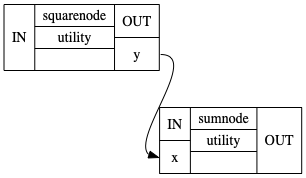

In [277]:

# Write graph of type orig
wf.write_graph(graph2use='exec')

# Visualize graph
from IPython.display import Image
Image(filename="graph_detailed.png")

In [272]:
wf.inputs.inputnode.in_files = [1,2,3,4,5,6]
results = wf.run()

220409-09:00:14,755 nipype.workflow INFO:
	 Workflow wf settings: ['check', 'execution', 'logging', 'monitoring']
220409-09:00:14,765 nipype.workflow INFO:
	 Running serially.
220409-09:00:14,774 nipype.workflow INFO:
	 [Node] Setting-up "_squarenode0" in "/private/var/folders/tv/89mnq15d42xb88p8n7thvy1w0000gn/T/tmpvorg0fm5/wf/squarenode/mapflow/_squarenode0".
220409-09:00:14,779 nipype.workflow INFO:
	 [Node] Executing "_squarenode0" <nipype.interfaces.utility.wrappers.Function>
220409-09:00:14,781 nipype.workflow INFO:
	 [Node] Finished "_squarenode0", elapsed time 0.00054s.
220409-09:00:14,786 nipype.workflow INFO:
	 [Node] Setting-up "_squarenode1" in "/private/var/folders/tv/89mnq15d42xb88p8n7thvy1w0000gn/T/tmpvorg0fm5/wf/squarenode/mapflow/_squarenode1".
220409-09:00:14,790 nipype.workflow INFO:
	 [Node] Executing "_squarenode1" <nipype.interfaces.utility.wrappers.Function>
220409-09:00:14,793 nipype.workflow INFO:
	 [Node] Finished "_squarenode1", elapsed time 0.000584s.
220409-

In [273]:
list(results.nodes())[0].result.inputs

[{'function_str': 'def square(x):\n    return x**2\n', 'x': 1},
 {'function_str': 'def square(x):\n    return x**2\n', 'x': 2},
 {'function_str': 'def square(x):\n    return x**2\n', 'x': 3},
 {'function_str': 'def square(x):\n    return x**2\n', 'x': 4},
 {'function_str': 'def square(x):\n    return x**2\n', 'x': 5},
 {'function_str': 'def square(x):\n    return x**2\n', 'x': 6}]

In [274]:
list(results.nodes())[1].result.inputs

{'function_str': 'def combine(x):\n    print(x)\n    import numpy as np\n    return np.sum(x)\n',
 'x': [1, 4, 9, 16, 25, 36]}

In [275]:
list(results.nodes())[0].result.outputs

Bunch(y=[1, 4, 9, 16, 25, 36])

In [276]:
list(results.nodes())[1].result.outputs


y = 91

In [255]:
results.nodes()

NodeView((wf.squarenode, wf.sumnode))

In [256]:
ii = IdentityInterface(fields=['in_files'])
ii.inputs.in_files = 4

In [257]:
n = pe.Node(IdentityInterface(fields=['in_files']),name='inputnode')

In [258]:
n.inputs.in_files = 4

In [73]:
res = n.run()

220408-19:14:44,20 nipype.workflow INFO:
	 [Node] Setting-up "inputnode" in "/private/var/folders/tv/89mnq15d42xb88p8n7thvy1w0000gn/T/tmpygt7mal_/inputnode".
220408-19:14:44,25 nipype.workflow INFO:
	 [Node] Executing "inputnode" <nipype.interfaces.utility.base.IdentityInterface>
220408-19:14:44,27 nipype.workflow INFO:
	 [Node] Finished "inputnode", elapsed time 0.000241s.


In [74]:
res.outputs


in_files = 4

In [77]:
n.result.outputs


in_files = 4

In [59]:
squarenode.inputs.x = [3,2,4,7]
squarenode.run()
squarenode.result.outputs

220408-15:51:23,17 nipype.workflow INFO:
	 [Node] Setting-up "_squarenode0" in "/private/var/folders/tv/89mnq15d42xb88p8n7thvy1w0000gn/T/tmpimdscjr_/squarenode/mapflow/_squarenode0".
220408-15:51:23,22 nipype.workflow INFO:
	 [Node] Executing "_squarenode0" <nipype.interfaces.utility.wrappers.Function>
220408-15:51:23,24 nipype.workflow INFO:
	 [Node] Finished "_squarenode0", elapsed time 0.000341s.
220408-15:51:23,29 nipype.workflow INFO:
	 [Node] Setting-up "_squarenode1" in "/private/var/folders/tv/89mnq15d42xb88p8n7thvy1w0000gn/T/tmpimdscjr_/squarenode/mapflow/_squarenode1".
220408-15:51:23,33 nipype.workflow INFO:
	 [Node] Executing "_squarenode1" <nipype.interfaces.utility.wrappers.Function>
220408-15:51:23,37 nipype.workflow INFO:
	 [Node] Finished "_squarenode1", elapsed time 0.000587s.
220408-15:51:23,42 nipype.workflow INFO:
	 [Node] Setting-up "_squarenode2" in "/private/var/folders/tv/89mnq15d42xb88p8n7thvy1w0000gn/T/tmpimdscjr_/squarenode/mapflow/_squarenode2".
220408-15:5

Bunch(y=[9, 4, 16, 49])

### fMRI example

In [301]:
from nipype.interfaces.afni import OutlierCount, Eval, 

In [302]:
in_files = [os.path.abspath(file) for file in ['func_01.nii','func_02.nii']]

In [306]:
inputnode = pe.Node(IdentityInterface(fields=["in_files"]), name="inputnode")

outlier_count = pe.MapNode(
    OutlierCount(automask=True, fraction=True, polort=5, legendre=True, out_file='outlier_cound.1D'),
    name="outlier_count",
    iterfield=['in_file'])

num_vols = pe.Node()

#add_counts = pe.Node(Eval(expr="a+b"), name="add_counts")

outputnode = pe.Node(
    IdentityInterface(fields=["run_idx, volume_idx"]), name="outputnode")

In [307]:
find_best_volume_wf = Workflow(name='find_best_volume')
find_best_volume_wf.connect([
    (inputnode,outlier_count,[('in_files','in_file')]),
])

In [308]:
find_best_volume_wf.inputs.inputnode.in_files = in_files
results = find_best_volume_wf.run()

220411-07:36:12,667 nipype.workflow INFO:
	 Workflow find_best_volume settings: ['check', 'execution', 'logging', 'monitoring']
220411-07:36:12,674 nipype.workflow INFO:
	 Running serially.
220411-07:36:12,681 nipype.workflow INFO:
	 [Node] Setting-up "_outlier_count0" in "/private/var/folders/tv/89mnq15d42xb88p8n7thvy1w0000gn/T/tmpb7oxsicb/find_best_volume/outlier_count/mapflow/_outlier_count0".
220411-07:36:12,685 nipype.workflow INFO:
	 [Node] Executing "_outlier_count0" <nipype.interfaces.afni.preprocess.OutlierCount>
220411-07:36:14,577 nipype.workflow INFO:
	 [Node] Finished "_outlier_count0", elapsed time 1.89017s.
220411-07:36:14,584 nipype.workflow INFO:
	 [Node] Setting-up "_outlier_count1" in "/private/var/folders/tv/89mnq15d42xb88p8n7thvy1w0000gn/T/tmpb7oxsicb/find_best_volume/outlier_count/mapflow/_outlier_count1".
220411-07:36:14,589 nipype.workflow INFO:
	 [Node] Executing "_outlier_count1" <nipype.interfaces.afni.preprocess.OutlierCount>
220411-07:36:16,379 nipype.workf

In [319]:
list(results.nodes())[0].result.outputs

Bunch(out_file=['/private/var/folders/tv/89mnq15d42xb88p8n7thvy1w0000gn/T/tmpb7oxsicb/find_best_volume/outlier_count/mapflow/_outlier_count0/outlier_cound.1D',
       '/private/var/folders/tv/89mnq15d42xb88p8n7thvy1w0000gn/T/tmpb7oxsicb/find_best_volume/outlier_count/mapflow/_outlier_count1/outlier_cound.1D'],
      out_outliers=<undefined>)

In [320]:
import lib_afni1D.py as LAD

ModuleNotFoundError: No module named 'lib_afni1D'

In [ ]:
def get_min_voldix(in_files):
    